In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def histogram_eq(img_path, output_path):
    image = cv2.imread(img_path)
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    y_eq = cv2.equalizeHist(y)
    ycrcb_eq = cv2.merge((y_eq, cr, cb))
    enhanced_image = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)
    cv2.imwrite(output_path, enhanced_image)

In [3]:
def lol_histogram(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)
            histogram_eq(input_path, output_path)

In [6]:
base_dir = r"C:\Users\DS17\Desktop\IVP 011\image enhancement on low lght\lol_dataset"

In [7]:
for subfolder in ["eval15", "our485"]:
    input_dir = os.path.join(base_dir, subfolder, "low")
    output_dir = os.path.join(base_dir, subfolder, "Output hist")
    lol_histogram(input_dir, output_dir)

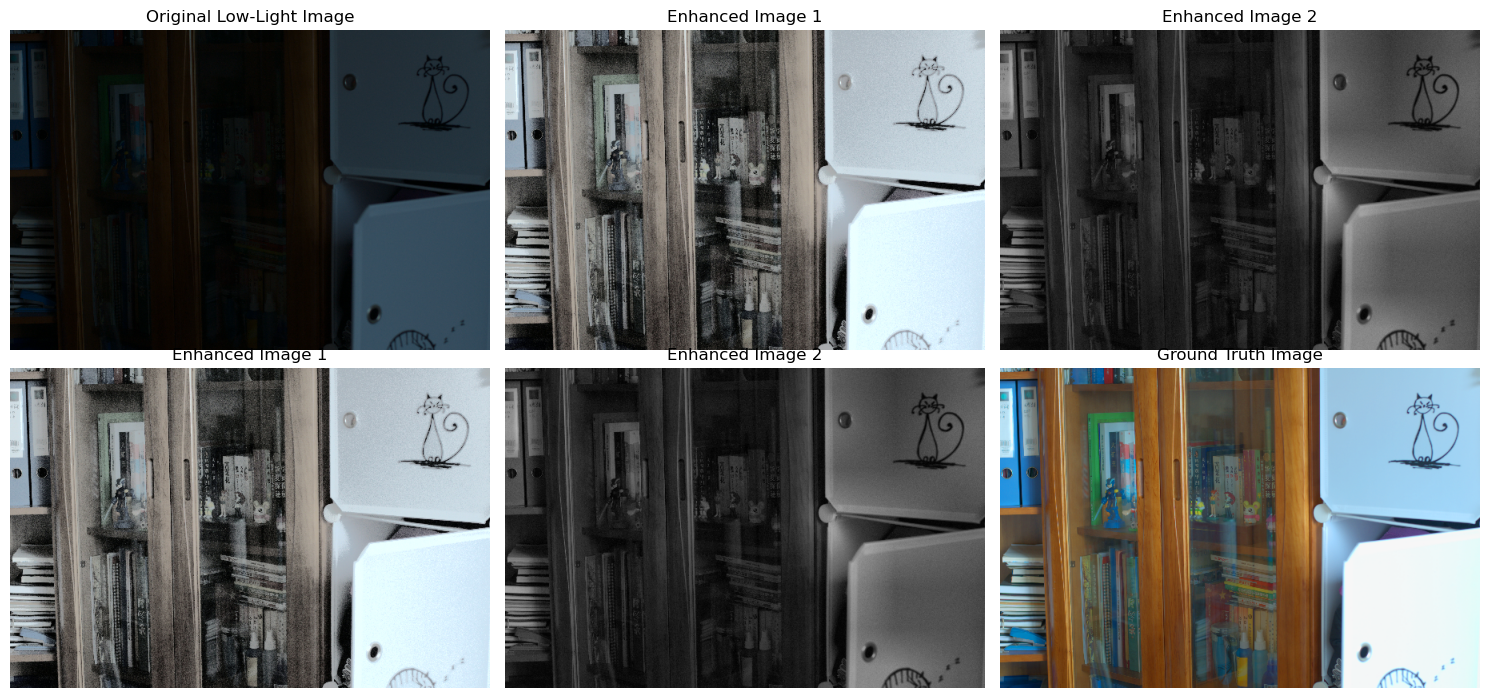

In [23]:
# Function to display double plots side by side
def visualize_double_plot(original_path, enhanced_paths, ground_truth_path):
    # Load the images
    original = cv2.imread(original_path)
    ground_truth = cv2.imread(ground_truth_path)

    # Convert images from BGR to RGB for displaying
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    ground_truth = cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB)

    # Plot the images
    plt.figure(figsize=(15, 7))
    
    # Titles for the first row (Original and Enhanced)
    titles_1 = ["Original Low-Light Image"] + [f"Enhanced Image {i+1}" for i in range(len(enhanced_paths))]

    # Titles for the second row (Enhanced and Ground Truth)
    titles_2 = [f"Enhanced Image {i+1}" for i in range(len(enhanced_paths))] + ["Ground Truth Image"]

    # List of images for the first row (Original and Enhanced)
    images_1 = [original] + [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in enhanced_paths]

    # List of images for the second row (Enhanced and Ground Truth)
    images_2 = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in enhanced_paths] + [ground_truth]

    # Plot the first set (Original and Enhanced)
    for i in range(len(images_1)):
        plt.subplot(2, len(images_1), i + 1)
        plt.imshow(images_1[i])
        plt.title(titles_1[i])
        plt.axis("off")

    # Plot the second set (Enhanced and Ground Truth)
    for i in range(len(images_2)):
        plt.subplot(2, len(images_2), len(images_1) + i + 1)
        plt.imshow(images_2[i])
        plt.title(titles_2[i])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
base_dir = "lol_dataset"
eval_dir = os.path.join(base_dir, "eval15")
low_image_path = os.path.join(eval_dir, "low", "1.png")  # Replace with an actual file name
enhanced_image_paths = [
    os.path.join(eval_dir, "Output hist", "1.png"),  # Replace with the enhanced image path for histogram equalization
    os.path.join(eval_dir, "Output CLAHE", "1.png")  # Replace with the enhanced image path for CLAHE
]
ground_truth_image_path = os.path.join(eval_dir, "high", "1.png")  # Replace with the corresponding ground truth image

visualize_double_plot(low_image_path, enhanced_image_paths, ground_truth_image_path)


In [14]:
def apply_clahe(input_path, output_path):
    image = cv2.imread(input_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    
    enhanced = clahe.apply(gray)
    
    enhanced_bgr = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)
    cv2.imwrite(output_path, enhanced_bgr)

In [15]:
def lol_clahe(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)
            apply_clahe(input_path, output_path)

In [16]:
for subfolder in ["eval15", "our485"]:
    input_dir = os.path.join(base_dir, subfolder, "low")
    output_dir2 = os.path.join(base_dir, subfolder, "Output CLAHE")
    lol_clahe(input_dir, output_dir2)